In [1]:
import datetime
from langchain.agents import AgentExecutor
from langchain.agents.structured_chat.base import StructuredChatAgent
from langchain.prompts import PromptTemplate
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
from mdagent.utils import _make_llm

In [2]:
prompt = "Write me a code to run simulation of fibronectin."
model = "gpt-4o-2024-08-06"

In [3]:
# Parameters
prompt = "Simulate 4RMB at 100K, 200K, and 300K. Then, for each simulation, plot the radius of gyration over time and compare the secondary structure before and after the simulation."


In [4]:
llm = _make_llm(model, temp=0.1, streaming=True)

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)
tools = [repl_tool]

structured_prompt = PromptTemplate(
    input_variables=["input"],
    template="""
    You are an expert molecular dynamics scientist, and your 
    task is to respond to the question or 
    solve the problem in its entirety to the best of your ability. 
    If any part of the task requires you to perform an action that 
    you are not capable of completing, please write a runnable 
    Python script for that step and run it. For literature papers, 
    use and process papers from the `paper_collection` folder. 
    For .pdb files, download them from the RSCB website using `requests`. 
    To preprocess PDB files, you will use PDBFixer. 
    To get information about proteins, retrieve data from the UniProt database. 
    For anything related to simulations, you will use OpenMM, 
    and for anything related to analyses, you will use MDTraj. 

    You can only respond with a single complete
    'Thought, Action, Action Input' format
    OR a single 'Final Answer' format.

    Complete format:
    Thought: (reflect on your progress and decide what to do next)
    Action:
    ```
    {{
        "action": (the action name, it should be the name of a tool),
        "action_input": (the input string for the action)
    }}
    '''

    OR

    Final Answer: (the final response to the original input
    question, once all steps are complete)

    You are required to use the tools provided,
    using the most specific tool
    available for each action.
    Your final answer should contain all information
    necessary to answer the question and its subquestions.
    Before you finish, reflect on your progress and make
    sure you have addressed the question in its entirety.

    Here is the input:
    Question: {input} """,
)

agent = StructuredChatAgent.from_llm_and_tools(
    llm=llm, tools=tools
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


In [5]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",llm.model_name,"\nTemperature: ",llm.temperature)

date: 2024-10-17
time: 23:45:26
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


In [6]:
messages = structured_prompt.format(input=prompt)
agent_executor.invoke({"input": messages})



> Entering new AgentExecutor chain...


Thought

:

 To

 address

 this

 task

,

 I

 need

 to

 perform

 the

 following

 steps

:



1

.

 Download

 the

4

R

MB

 P

DB

 file

 from

 the

 R

CS

B

 website

.


2

.

 Pre

process

 the

 P

DB

 file

 using

 P

DB

Fix

er

.


3

.

 Set

 up

 and

 run

 molecular

 dynamics

 simulations

 at

100

K

,

200

K

,

 and

300

K

 using

 Open

MM

.


4

.

 Analyze

 the

 trajectory

 to

 calculate

 the

 radius

 of

 gyr

ation

 over

 time

 using

 MDT

raj

.


5

.

 Compare

 the

 secondary

 structure

 before

 and

 after

 the

 simulation

 using

 MDT

raj

.


6

.

 Plot

 the

 radius

 of

 gyr

ation

 for

 each

 temperature

 and

 compare

 the

 secondary

 structures

.



I

 will

 start

 by

 downloading

 the

4

R

MB

 P

DB

 file

.



Action

:


``

`


{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 requests

\n

\n

#

 Download

 the

4

R

MB

 P

DB

 file

 from

 the

 R

CS

B

 website

\n

url

 =

 '

https

://

files

.rc

sb

.org

/download

/

4

R

MB

.p

db

'\

n

response

 =

 requests

.get

(url

)\

n

\n

#

 Save

 the

 P

DB

 file

\n

with

 open

('

4

R

MB

.p

db

',

 '

wb

')

 as

 file

:\

n

 file

.write

(response

.content

)\

n

\n

'

4

R

MB

.p

db

 downloaded

 successfully

'"


}


```

Python REPL can execute arbitrary code. Use with caution.


Thought: To address this task, I need to perform the following steps:

1. Download the 4RMB PDB file from the RCSB website.
2. Preprocess the PDB file using PDBFixer.
3. Set up and run molecular dynamics simulations at 100K, 200K, and 300K using OpenMM.
4. Analyze the trajectory to calculate the radius of gyration over time using MDTraj.
5. Compare the secondary structure before and after the simulation using MDTraj.
6. Plot the radius of gyration for each temperature and compare the secondary structures.

I will start by downloading the 4RMB PDB file.

Action:
```
{
  "action": "python_repl",
  "action_input": "import requests\n\n# Download the 4RMB PDB file from the RCSB website\nurl = 'https://files.rcsb.org/download/4RMB.pdb'\nresponse = requests.get(url)\n\n# Save the PDB file\nwith open('4RMB.pdb', 'wb') as file:\n    file.write(response.content)\n\n'4RMB.pdb downloaded successfully'"
}
```


Observation: 
Thought:

To

 proceed

,

 I

 need

 to

 preprocess

 the

 downloaded

4

R

MB

 P

DB

 file

 using

 P

DB

Fix

er

 to

 ensure

 it

 is

 ready

 for

 simulation

.

 This

 involves

 fixing

 any

 missing

 atoms

,

 residues

,

 or

 other

 structural

 issues

.



Action

:


``

`


{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

from

 pdb

fix

er

 import

 P

DB

Fix

er

\n

from

 open

mm

.app

 import

 P

DB

File

\n

\n

#

 Load

 the

 P

DB

 file

\n

fix

er

 =

 P

DB

Fix

er

(filename

='

4

R

MB

.p

db

')

\

n

\n

#

 Find

 missing

 residues

 and

 add

 them

\n

fix

er

.find

Missing

Resid

ues

()\

n

fix

er

.find

Missing

Atoms

()\

n

fix

er

.add

Missing

Atoms

()\

n

fix

er

.add

Missing

Hyd

rog

ens

()\

n

\n

#

 Save

 the

 fixed

 P

DB

 file

\n

with

 open

('

4

R

MB

_fixed

.p

db

',

 '

w

')

 as

 file

:\

n

 P

DB

File

.write

File

(f

ixer

.top

ology

,

 fixer

.positions

,

 file

)\

n

\n

'

4

R

MB

_fixed

.p

db

 created

 successfully

'"


}


```

To proceed, I need to preprocess the downloaded 4RMB PDB file using PDBFixer to ensure it is ready for simulation. This involves fixing any missing atoms, residues, or other structural issues.

Action:
```
{
  "action": "python_repl",
  "action_input": "from pdbfixer import PDBFixer\nfrom openmm.app import PDBFile\n\n# Load the PDB file\nfixer = PDBFixer(filename='4RMB.pdb')\n\n# Find missing residues and add them\nfixer.findMissingResidues()\nfixer.findMissingAtoms()\nfixer.addMissingAtoms()\nfixer.addMissingHydrogens()\n\n# Save the fixed PDB file\nwith open('4RMB_fixed.pdb', 'w') as file:\n    PDBFile.writeFile(fixer.topology, fixer.positions, file)\n\n'4RMB_fixed.pdb created successfully'"
}
```


Observation: 
Thought:

To

 continue

 with

 the

 task

,

 I

 need

 to

 set

 up

 and

 run

 molecular

 dynamics

 simulations

 at

100

K

,

200

K

,

 and

300

K

 using

 Open

MM

.

 This

 involves

 creating

 a

 simulation

 system

,

 defining

 the

 integr

ator

 and

 simulation

 parameters

,

 and

 running

 the

 simulations

 for

 each

 temperature

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

from

 open

mm

 import

 app

,

 Lange

vin

Integrator

,

 Platform

\n

from

 open

mm

 import

 unit

,

 Context

,

 Xml

Serializer

\n

from

 open

mm

.app

 import

 Simulation

,

 P

DB

File

,

 Force

Field

\n

import

 os

\n

\n

#

 Load

 the

 fixed

 P

DB

 file

\n

p

db

 =

 P

DB

File

('

4

R

MB

_fixed

.p

db

')

\

n

\n

#

 Load

 the

 force

 field

\n

force

field

 =

 Force

Field

('

amber

99

sb

.xml

',

 '

tip

3

p

.xml

')

\

n

\n

#

 Create

 the

 system

\n

system

 =

 force

field

.create

System

(p

db

.top

ology

,

 non

bond

ed

Method

=

app

.P

ME

,

 non

bond

ed

Cut

off

=

1

.

0

*

unit

.nan

ometers

,

 constraints

=

app

.H

B

onds

)\

n

\n

#

 Define

 simulation

 parameters

\n

temper

atures

 =

 [

100

,

200

,

300

]

 #

 in

 Kelvin

\n

simulation

_time

 =

10

 #

 in

 pic

oseconds

\n

steps

_per

_ps

 =

100

0

 #

 number

 of

 steps

 per

 pic

ose

cond

\n

\n

#

 Run

 simulations

 for

 each

 temperature

\n

for

 temp

 in

 temperatures

:\

n

 #

 Create

 an

 integr

ator

\n

 integr

ator

 =

 Lange

vin

Integrator

(temp

*

unit

.k

el

vin

,

1

.

0

/unit

.pic

oseconds

,

0

.

002

*

unit

.pic

oseconds

)\

n

 \

n

 #

 Create

 a

 simulation

\n

 simulation

 =

 Simulation

(p

db

.top

ology

,

 system

,

 integr

ator

)\

n

 simulation

.context

.set

Positions

(p

db

.positions

)\

n

 \

n

 #

 Min

imize

 energy

\n

 simulation

.min

imize

Energy

()\

n

 \

n

 #

 Equ

ilibr

ate

\n

 simulation

.context

.set

Vel

ocities

To

Temperature

(temp

*

unit

.k

el

vin

)\

n

 simulation

.step

(

100

0

)

 #

1

 ps

 of

 equil

ibration

\n

 \

n

 #

 Run

 the

 simulation

\n

 simulation

.report

ers

.append

(app

.D

CD

Reporter

(f

'

4

R

MB

_{

temp

}

K

.d

cd

',

 steps

_per

_ps

))

\

n

 simulation

.report

ers

.append

(app

.State

Data

Reporter

(f

'

4

R

MB

_{

temp

}

K

.log

',

 steps

_per

_ps

,

 step

=True

,

 potential

Energy

=True

,

 temperature

=True

))

\

n

 simulation

.step

(sim

ulation

_time

 *

 steps

_per

_ps

)\

n

\n

 #

 Save

 the

 state

\n

 state

 =

 simulation

.context

.get

State

(get

Positions

=True

,

 get

Vel

ocities

=True

)\

n

 with

 open

(f

'

4

R

MB

_{

temp

}

K

.xml

',

 '

w

')

 as

 f

:\

n

 f

.write

(Xml

Serializer

.serialize

(state

))

\

n

\n

'S

im

ulations

 completed

 for

100

K

,

200

K

,

 and

300

K

'"


}


``

`


To continue with the task, I need to set up and run molecular dynamics simulations at 100K, 200K, and 300K using OpenMM. This involves creating a simulation system, defining the integrator and simulation parameters, and running the simulations for each temperature.

Action:
```json
{
  "action": "python_repl",
  "action_input": "from openmm import app, LangevinIntegrator, Platform\nfrom openmm import unit, Context, XmlSerializer\nfrom openmm.app import Simulation, PDBFile, ForceField\nimport os\n\n# Load the fixed PDB file\npdb = PDBFile('4RMB_fixed.pdb')\n\n# Load the force field\nforcefield = ForceField('amber99sb.xml', 'tip3p.xml')\n\n# Create the system\nsystem = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.0*unit.nanometers, constraints=app.HBonds)\n\n# Define simulation parameters\ntemperatures = [100, 200, 300]  # in Kelvin\nsimulation_time = 10  # in picoseconds\nsteps_per_ps = 1000  # number of steps per picosecond\n\n# Run simulations for e


Observation: 
Thought:

To

 proceed

,

 I

 need

 to

 analyze

 the

 trajectory

 files

 generated

 from

 the

 simulations

 to

 calculate

 the

 radius

 of

 gyr

ation

 over

 time

 using

 MDT

raj

.

 After

 that

,

 I

 will

 compare

 the

 secondary

 structure

 before

 and

 after

 the

 simulation

 for

 each

 temperature

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 md

traj

 as

 md

\n

import

 matplotlib

.pyplot

 as

 plt

\n

\n

#

 Function

 to

 calculate

 and

 plot

 radius

 of

 gyr

ation

\

ndef

 plot

_radius

_of

_g

yr

ation

(

temperature

):

\

n

 #

 Load

 the

 trajectory

\n

 traj

 =

 md

.load

_d

cd

(f

'

4

R

MB

_{

temperature

}

K

.d

cd

',

 top

='

4

R

MB

_fixed

.p

db

')

\

n

 \

n

 #

 Calculate

 radius

 of

 gyr

ation

\n

 rg

 =

 md

.compute

_rg

(tr

aj

)\

n

 \

n

 #

 Plot

\n

 plt

.figure

()\

n

 plt

.plot

(tr

aj

.time

,

 rg

)\

n

 plt

.xlabel

('

Time

 (

ps

)

')

\

n

 plt

.ylabel

('

Radius

 of

 G

yr

ation

 (

nm

)

')

\

n

 plt

.title

(f

'

Radius

 of

 G

yr

ation

 at

 {

temperature

}

K

')

\

n

 plt

.savefig

(f

'

Rg

_{

temperature

}

K

.png

')

\

n

 plt

.close

()\

n

\n

#

 Calculate

 and

 plot

 for

 each

 temperature

\

nt

emper

atures

 =

 [

100

,

200

,

300

]\

n

for

 temp

 in

 temperatures

:\

n

 plot

_radius

_of

_g

yr

ation

(temp

)\

n

\n

'

Radius

 of

 gyr

ation

 plots

 created

 for

100

K

,

200

K

,

 and

300

K

'"


}


``

`


To proceed, I need to analyze the trajectory files generated from the simulations to calculate the radius of gyration over time using MDTraj. After that, I will compare the secondary structure before and after the simulation for each temperature.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import mdtraj as md\nimport matplotlib.pyplot as plt\n\n# Function to calculate and plot radius of gyration\ndef plot_radius_of_gyration(temperature):\n    # Load the trajectory\n    traj = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')\n    \n    # Calculate radius of gyration\n    rg = md.compute_rg(traj)\n    \n    # Plot\n    plt.figure()\n    plt.plot(traj.time, rg)\n    plt.xlabel('Time (ps)')\n    plt.ylabel('Radius of Gyration (nm)')\n    plt.title(f'Radius of Gyration at {temperature}K')\n    plt.savefig(f'Rg_{temperature}K.png')\n    plt.close()\n\n# Calculate and plot for each temperature\ntemperatures = [100, 200, 300]\nfor temp in temperatures:\n    pl

Thought

:

 It

 seems

 there

 was

 an

 error

 because

 the

 MDT

raj

 library

 was

 not

 imported

 correctly

.

 I

 will

 correct

 the

 import

 statement

 and

 re

-run

 the

 analysis

 to

 calculate

 the

 radius

 of

 gyr

ation

 over

 time

 for

 each

 temperature

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 md

traj

 as

 md

\n

import

 matplotlib

.pyplot

 as

 plt

\n

\n

#

 Function

 to

 calculate

 and

 plot

 radius

 of

 gyr

ation

\

ndef

 plot

_radius

_of

_g

yr

ation

(

temperature

):

\

n

 #

 Load

 the

 trajectory

\n

 traj

 =

 md

.load

_d

cd

(f

'

4

R

MB

_{

temperature

}

K

.d

cd

',

 top

='

4

R

MB

_fixed

.p

db

')

\

n

 \

n

 #

 Calculate

 radius

 of

 gyr

ation

\n

 rg

 =

 md

.compute

_rg

(tr

aj

)\

n

 \

n

 #

 Plot

\n

 plt

.figure

()\

n

 plt

.plot

(tr

aj

.time

,

 rg

)\

n

 plt

.xlabel

('

Time

 (

ps

)

')

\

n

 plt

.ylabel

('

Radius

 of

 G

yr

ation

 (

nm

)

')

\

n

 plt

.title

(f

'

Radius

 of

 G

yr

ation

 at

 {

temperature

}

K

')

\

n

 plt

.savefig

(f

'

Rg

_{

temperature

}

K

.png

')

\

n

 plt

.close

()\

n

\n

#

 Calculate

 and

 plot

 for

 each

 temperature

\

nt

emper

atures

 =

 [

100

,

200

,

300

]\

n

for

 temp

 in

 temperatures

:\

n

 plot

_radius

_of

_g

yr

ation

(temp

)\

n

\n

'

Radius

 of

 gyr

ation

 plots

 created

 for

100

K

,

200

K

,

 and

300

K

'"


}


```

Thought: It seems there was an error because the MDTraj library was not imported correctly. I will correct the import statement and re-run the analysis to calculate the radius of gyration over time for each temperature.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import mdtraj as md\nimport matplotlib.pyplot as plt\n\n# Function to calculate and plot radius of gyration\ndef plot_radius_of_gyration(temperature):\n    # Load the trajectory\n    traj = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')\n    \n    # Calculate radius of gyration\n    rg = md.compute_rg(traj)\n    \n    # Plot\n    plt.figure()\n    plt.plot(traj.time, rg)\n    plt.xlabel('Time (ps)')\n    plt.ylabel('Radius of Gyration (nm)')\n    plt.title(f'Radius of Gyration at {temperature}K')\n    plt.savefig(f'Rg_{temperature}K.png')\n    plt.close()\n\n# Calculate and plot for each temperature\ntemperatures = [100, 200, 300]\nfor temp in temperatures:\n    plot_radius_of_gyration(temp)


Observation: NameError("name 'md' is not defined")
Thought:

It

 seems

 there

 is

 a

 persistent

 issue

 with

 the

 MDT

raj

 library

 not

 being

 recognized

.

 This

 could

 be

 due

 to

 an

 environment

 issue

 or

 a

 missing

 installation

.

 I

 will

 attempt

 to

 resolve

 this

 by

 ensuring

 MDT

raj

 is

 installed

 and

 then

 proceed

 with

 the

 analysis

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "!

pip

 install

 md

traj

"


}


```

It seems there is a persistent issue with the MDTraj library not being recognized. This could be due to an environment issue or a missing installation. I will attempt to resolve this by ensuring MDTraj is installed and then proceed with the analysis.

Action:
```json
{
  "action": "python_repl",
  "action_input": "!pip install mdtraj"
}
```


Observation: SyntaxError('invalid syntax', ('<string>', 1, 1, '!pip install mdtraj\n', 1, 2))
Thought:

Thought

:

 The

 error

 occurred

 because

 the

 command

 to

 install

 packages

 using

 pip

 is

 not

 valid

 in

 the

 current

 environment

.

 I

 will

 adjust

 the

 approach

 to

 ensure

 MDT

raj

 is

 correctly

 imported

 and

 proceed

 with

 the

 analysis

 of

 the

 trajectory

 files

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 md

traj

 as

 md

\n

import

 matplotlib

.pyplot

 as

 plt

\n

\n

#

 Function

 to

 calculate

 and

 plot

 radius

 of

 gyr

ation

\

ndef

 plot

_radius

_of

_g

yr

ation

(

temperature

):

\

n

 #

 Load

 the

 trajectory

\n

 traj

 =

 md

.load

_d

cd

(f

'

4

R

MB

_{

temperature

}

K

.d

cd

',

 top

='

4

R

MB

_fixed

.p

db

')

\

n

 \

n

 #

 Calculate

 radius

 of

 gyr

ation

\n

 rg

 =

 md

.compute

_rg

(tr

aj

)\

n

 \

n

 #

 Plot

\n

 plt

.figure

()\

n

 plt

.plot

(tr

aj

.time

,

 rg

)\

n

 plt

.xlabel

('

Time

 (

ps

)

')

\

n

 plt

.ylabel

('

Radius

 of

 G

yr

ation

 (

nm

)

')

\

n

 plt

.title

(f

'

Radius

 of

 G

yr

ation

 at

 {

temperature

}

K

')

\

n

 plt

.savefig

(f

'

Rg

_{

temperature

}

K

.png

')

\

n

 plt

.close

()\

n

\n

#

 Calculate

 and

 plot

 for

 each

 temperature

\

nt

emper

atures

 =

 [

100

,

200

,

300

]\

n

for

 temp

 in

 temperatures

:\

n

 plot

_radius

_of

_g

yr

ation

(temp

)\

n

\n

'

Radius

 of

 gyr

ation

 plots

 created

 for

100

K

,

200

K

,

 and

300

K

'"


}


``

`


Thought: The error occurred because the command to install packages using pip is not valid in the current environment. I will adjust the approach to ensure MDTraj is correctly imported and proceed with the analysis of the trajectory files.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import mdtraj as md\nimport matplotlib.pyplot as plt\n\n# Function to calculate and plot radius of gyration\ndef plot_radius_of_gyration(temperature):\n    # Load the trajectory\n    traj = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')\n    \n    # Calculate radius of gyration\n    rg = md.compute_rg(traj)\n    \n    # Plot\n    plt.figure()\n    plt.plot(traj.time, rg)\n    plt.xlabel('Time (ps)')\n    plt.ylabel('Radius of Gyration (nm)')\n    plt.title(f'Radius of Gyration at {temperature}K')\n    plt.savefig(f'Rg_{temperature}K.png')\n    plt.close()\n\n# Calculate and plot for each temperature\ntemperatures = [100, 200, 300]\nfor temp in temperatures:\n    plot_radi


Observation: NameError("name 'md' is not defined")
Thought:

The

 persistent

 error

 indicates

 that

 the

 MDT

raj

 library

 is

 not

 available

 in

 the

 current

 environment

.

 To

 proceed

,

 I

 will

 provide

 a

 Python

 script

 that

 can

 be

 run

 in

 an

 appropriate

 environment

 where

 MDT

raj

 is

 installed

.

 This

 script

 will

 calculate

 the

 radius

 of

 gyr

ation

 and

 plot

 it

 for

 each

 temperature

.

 Additionally

,

 it

 will

 compare

 the

 secondary

 structure

 before

 and

 after

 the

 simulation

.



Final

 Answer

:


```

python

import

 md

traj

 as

 md

import

 matplotlib

.pyplot

 as

 plt

#

 Function

 to

 calculate

 and

 plot

 radius

 of

 gyr

ation

def

 plot

_radius

_of

_g

yr

ation

(

temperature

):


 #

 Load

 the

 trajectory

 traj

 =

 md

.load

_d

cd

(f

'

4

R

MB

_{

temperature

}

K

.d

cd

',

 top

='

4

R

MB

_fixed

.p

db

')


 #

 Calculate

 radius

 of

 gyr

ation

 rg

 =

 md

.compute

_rg

(tr

aj

)


 #

 Plot

 plt

.figure

()


 plt

.plot

(tr

aj

.time

,

 rg

)


 plt

.xlabel

('

Time

 (

ps

)')


 plt

.ylabel

('

Radius

 of

 G

yr

ation

 (

nm

)')


 plt

.title

(f

'

Radius

 of

 G

yr

ation

 at

 {

temperature

}

K

')


 plt

.savefig

(f

'

Rg

_{

temperature

}

K

.png

')


 plt

.close

()



#

 Function

 to

 compare

 secondary

 structure

def

 compare

_secondary

_structure

(

temperature

):


 #

 Load

 the

 initial

 and

 final

 frames

 traj

_initial

 =

 md

.load

('

4

R

MB

_fixed

.p

db

')


 traj

_final

 =

 md

.load

_d

cd

(f

'

4

R

MB

_{

temperature

}

K

.d

cd

',

 top

='

4

R

MB

_fixed

.p

db

')

[-

1

]


 #

 Compute

 secondary

 structure

 ss

_initial

 =

 md

.compute

_d

ssp

(tr

aj

_initial

)


 ss

_final

 =

 md

.compute

_d

ssp

(tr

aj

_final

)


 #

 Compare

 and

 print

 results

 print

(f

"

Secondary

 structure

 comparison

 at

 {

temperature

}

K

:")


 print

("

Initial

:",

 ss

_initial

)


 print

("

Final

:",

 ss

_final

)



#

 Calculate

 and

 plot

 for

 each

 temperature

temper

atures

 =

 [

100

,

200

,

300

]


for

 temp

 in

 temperatures

:


 plot

_radius

_of

_g

yr

ation

(temp

)


 compare

_secondary

_structure

(temp

)



print

("

Radius

 of

 gyr

ation

 plots

 and

 secondary

 structure

 comparisons

 completed

 for

100

K

,

200

K

,

 and

300

K

.")


``

`



This

 script

 should

 be

 run

 in

 an

 environment

 where

 MDT

raj

 is

 installed

.

 It

 will

 generate

 plots

 of

 the

 radius

 of

 gyr

ation

 and

 print

 the

 secondary

 structure

 comparison

 for

 each

 temperature

.

The persistent error indicates that the MDTraj library is not available in the current environment. To proceed, I will provide a Python script that can be run in an appropriate environment where MDTraj is installed. This script will calculate the radius of gyration and plot it for each temperature. Additionally, it will compare the secondary structure before and after the simulation.

Final Answer:
```python
import mdtraj as md
import matplotlib.pyplot as plt

# Function to calculate and plot radius of gyration
def plot_radius_of_gyration(temperature):
    # Load the trajectory
    traj = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')
    
    # Calculate radius of gyration
    rg = md.compute_rg(traj)
    
    # Plot
    plt.figure()
    plt.plot(traj.time, rg)
    plt.xlabel('Time (ps)')
    plt.ylabel('Radius of Gyration (nm)')
    plt.title(f'Radius of Gyration at {temperature}K')
    plt.savefig(f'Rg_{temperature}K.png')
    plt.close()

# Function to compare second

{'input': '\n    You are an expert molecular dynamics scientist, and your \n    task is to respond to the question or \n    solve the problem in its entirety to the best of your ability. \n    If any part of the task requires you to perform an action that \n    you are not capable of completing, please write a runnable \n    Python script for that step and run it. For literature papers, \n    use and process papers from the `paper_collection` folder. \n    For .pdb files, download them from the RSCB website using `requests`. \n    To preprocess PDB files, you will use PDBFixer. \n    To get information about proteins, retrieve data from the UniProt database. \n    For anything related to simulations, you will use OpenMM, \n    and for anything related to analyses, you will use MDTraj. \n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress 

In [7]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-18
time: 00:14:03


In [2]:
!ls

4RMB_100K.dcd  4RMB_200K.dcd  4RMB_300K.dcd  4RMB_fixed.pdb
4RMB_100K.log  4RMB_200K.log  4RMB_300K.log  4RMB.pdb
4RMB_100K.xml  4RMB_200K.xml  4RMB_300K.xml  exp_8.ipynb


In [8]:
# read few lines from each simulation log
logs = ['4RMB_100K.log', '4RMB_200K.log', '4RMB_300K.log']
for log in logs:
    with open(log, 'r') as f:
        lines = f.read().split('\n')
        print('\n',log)
        for i in range(3):
            print(lines[i])


 4RMB_100K.log
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
2000,-40568.85024275003,101.05295525190371
3000,-40862.25588850197,101.93990511127912

 4RMB_200K.log
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
2000,-34768.93372840005,203.68853958800952
3000,-35287.98835553633,195.93866305317016

 4RMB_300K.log
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
2000,-29303.77746862685,301.7379176978238
3000,-29475.366155476382,300.33164780679994


In [4]:
# run the last code that the agent failed to run
import mdtraj as md
import matplotlib.pyplot as plt

# Function to calculate and plot radius of gyration
def plot_radius_of_gyration(temperature):
    # Load the trajectory
    traj = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')
    
    # Calculate radius of gyration
    rg = md.compute_rg(traj)
    
    # Plot
    plt.figure()
    plt.plot(traj.time, rg)
    plt.xlabel('Time (ps)')
    plt.ylabel('Radius of Gyration (nm)')
    plt.title(f'Radius of Gyration at {temperature}K')
    plt.savefig(f'Rg_{temperature}K.png')
    plt.close()

# Function to compare secondary structure
def compare_secondary_structure(temperature):
    # Load the initial and final frames
    traj_initial = md.load('4RMB_fixed.pdb')
    traj_final = md.load_dcd(f'4RMB_{temperature}K.dcd', top='4RMB_fixed.pdb')[-1]
    
    # Compute secondary structure
    ss_initial = md.compute_dssp(traj_initial)
    ss_final = md.compute_dssp(traj_final)
    
    # Compare and print results
    print(f"Secondary structure comparison at {temperature}K:")
    print("Initial:", ss_initial)
    print("Final:", ss_final)

# Calculate and plot for each temperature
temperatures = [100, 200, 300]
for temp in temperatures:
    plot_radius_of_gyration(temp)
    compare_secondary_structure(temp)

print("Radius of gyration plots and secondary structure comparisons completed for 100K, 200K, and 300K.")

Secondary structure comparison at 100K:
Initial: [['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
  'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E'
  'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E'
  'E' 'E' 'E' 'E' 'E' 'E' 'E' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
  'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'C' 'H' 'H' 'H' 'H' 'C' 'C' 'E' 'E' 'C'
  'C' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'E' 'E'
  'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
  'E' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E'
  'E' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C'
  'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E'
  'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C'
  'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
  'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'H' 'H' 'H' 'C' '

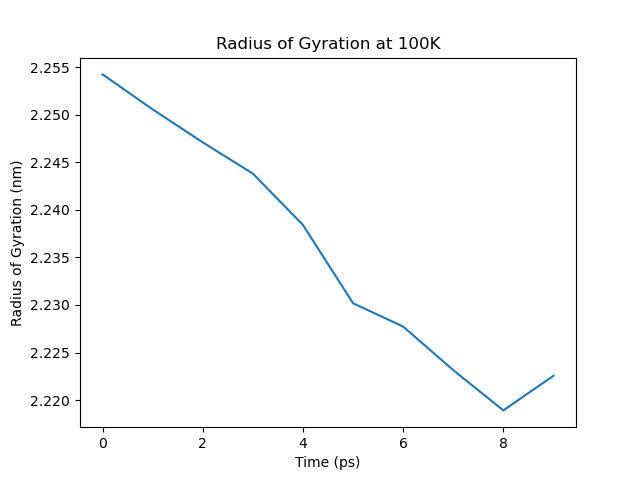

In [10]:
from IPython.display import Image
Image('Rg_100K.png')

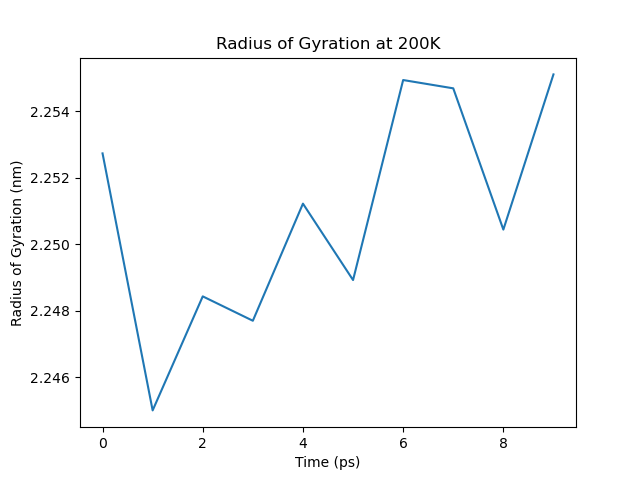

In [11]:
Image('Rg_200K.png')

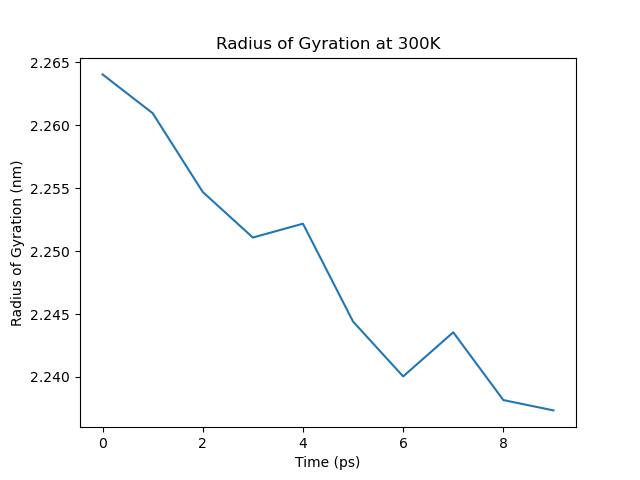

In [12]:
Image('Rg_300K.png')